In [ ]:
import os

def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/olisvalue/contests/baseline/data/test"  # Замените на путь к вашей директории
total_files = count_files(directory_path)
print(f"Total number of files: {total_files}")


In [23]:
!git add .

In [24]:
!git commit -m "fixed augmentations"

[augmentations dbe253b] fixed augmentations
 10 files changed, 883 insertions(+), 900 deletions(-)
 rewrite models/__pycache__/data_loader.cpython-310.pyc (60%)
 rewrite trash.ipynb (77%)


In [ ]:
!git push origin coverhunter

In [ ]:
!nvidia-smi

In [ ]:
model

In [ ]:
def dataloader_factory(config: Dict, data_split: str) -> List[DataLoader]:
    return cover_dataloader(
        data_path=config["data_path"],
        file_ext=config["file_extension"],
        #dataset_path=config[data_split]["dataset_path"],
        data_split=data_split,
        debug=config["debug"],
        max_len=50,
        **config[data_split]
    )

In [1]:
from models.data_loader import *
from models.train_module import TrainModule
from utils import initialize_logging, load_config

config = load_config(config_path="./config/config.yaml")

data = CoverDataset(
    data_path=config["data_path"],
    file_ext=config["file_extension"],
    data_split='train',
    debug=config["debug"],
    max_len=50,
    dataset_path="/home/olisvalue/contests/baseline/data/train"),


2024-11-02 16:46:52,382 INFO This log message will be sent to wandb!


TypeError: CoverDataset.__init__() missing 1 required positional argument: 'config'

In [ ]:
data[10]

In [ ]:
class zero:
    def item(self):
        return 0

In [ ]:
import os
import torch

def save_data_dynamically(data, root_dir='train'):
    """
    Сохраняет данные динамически, организуя их по структуре anchor_label/anchor_id.pt.
    
    Параметры:
    - data: исходный датасет, состоящий из элементов с полями 'anchor_id', 'anchor', 'anchor_label', 'positive', 'negative'.
    - root_dir: корневая директория для сохранения данных.
    """
    # Создание корневой директории
    os.makedirs(root_dir, exist_ok=True)
    
    for item in data:
        # Извлекаем anchor_label и anchor_id
        anchor_label = int(item['anchor_label'].item())
        anchor_id = item['anchor_id']
        
        # Создаем директорию для текущей метки, если она еще не существует
        label_dir = os.path.join(root_dir, str(anchor_label))
        os.makedirs(label_dir, exist_ok=True)
        
        # Формируем путь к файлу для anchor и сохраняем его
        anchor_file_path = os.path.join(label_dir, f"{anchor_id}.pt")
        torch.save(item['anchor'], anchor_file_path)
        
        # Можно добавить аналогичное сохранение для positive и negative, если требуется
        positive_id = item.get('positive_id')
        negative_id = item.get('negative_id')
        
        if positive_id:
            positive_file_path = os.path.join(label_dir, f"{positive_id}_positive.pt")
            torch.save(item['positive'], positive_file_path)
        
        if negative_id:
            negative_file_path = os.path.join(label_dir, f"{negative_id}_negative.pt")
            torch.save(item['negative'], negative_file_path)

# Пример вызова функции
# save_data_dynamically(data)


In [ ]:
from collections import defaultdict

# Инициализируем словарь для подсчета треков в каждой клике
clique_counts = defaultdict(int)

# Проходим по каждому объекту в `CoverDataset` и считаем клики
for item in data:
    clique_id = int(item['anchor_label'].item())
    clique_counts[clique_id] += 1

# Подсчитываем общее количество уникальных клик
total_cliques = len(clique_counts)

# Находим минимальный, максимальный размер клики и дисперсию
clique_sizes = list(clique_counts.values())
min_clique_size = min(clique_sizes)
max_clique_size = max(clique_sizes)
std_dev_clique_size = np.std(clique_sizes)

print(f"Всего клик: {total_cliques}")
print(f"Минимальный размер клики: {min_clique_size}")
print(f"Максимальный размер клики: {max_clique_size}")
print(f"Среднеквадратичное отклонение размеров клик: {std_dev_clique_size}")


In [ ]:
np.mean(clique_sizes)

In [ ]:
import random

# Выбираем случайный clique_id
random_clique_id = random.choice(list(clique_counts.keys()))

# Собираем все треки из выбранной клики
sample_from_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])


In [ ]:
0.9975**20

In [ ]:
# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, item in enumerate(sample_from_clique[:10]):
    cqt_spectrogram = item['anchor'].numpy()  # Получаем данные спектрограммы
    
    ax = axs[i // 5, i % 5]
    ax.imshow(cqt_spectrogram, aspect='auto', origin='lower')
    ax.set_title(f"ID: {item['anchor_id']}")
    ax.axis('off')

plt.suptitle(f"CQT-спектрограммы треков из клики {random_clique_id}")
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt

# Выбираем случайный clique_id из данных
# random_clique_id = random.choice(list(clique_counts.keys()))

# # Извлекаем все треки (анкор и их негативы) из выбранной клики
# tracks_in_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 5 треков для визуализации (или все, если в клике меньше 5 треков)
# sample_tracks = random.sample(tracks_in_clique, min(5, len(tracks_in_clique)))

fig, axs = plt.subplots(2, len(sample_from_clique), figsize=(15, 6))

for i, item in enumerate(sample_from_clique):
    # Извлекаем CQT-спектрограммы для anchor и negative
    anchor_spectrogram = item['anchor'].numpy()
    negative_spectrogram = item['negative'].numpy()
    
    # Отображаем спектрограмму anchor
    ax_anchor = axs[0, i]
    ax_anchor.imshow(anchor_spectrogram, aspect='auto', origin='lower')
    ax_anchor.set_title(f"Anchor ID: {item['anchor_id']}")
    ax_anchor.axis('off')

    # Отображаем спектрограмму negative
    ax_negative = axs[1, i]
    ax_negative.imshow(negative_spectrogram, aspect='auto', origin='lower')
    ax_negative.set_title(f"Negative ID: {item['negative_id']}")
    ax_negative.axis('off')

# Добавляем общие заголовки
plt.suptitle(f"CQT-спектрограммы Anchor и Negative для клики {random_clique_id}")
plt.show()

In [ ]:
from models.modules import Bottleneck, Resnet50, TransformerEncoderModel
model = Resnet50(
            Bottleneck,
            num_channels=1,
            num_classes=39535,
            dropout=0.1
        )
model.to('cuda:0')


# out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
model

In [ ]:
model.eval()
out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
from models.new_modules import Model
from utils import load_config

config = load_config(config_path="./config/config.yaml")

model = Model(config).to(device='cuda:0')

In [ ]:
import torch
checkpoint = torch.load("/home/olisvalue/contests/baseline/CoverHunter/pretrain_model/pt_model/g_00000040")["generator"]

ignore_list = ["_global_cmvn.weight", "_global_cmvn.bias", "_global_cmvn.running_mean",
               "_global_cmvn.running_var", "_encoder.embed.out.0.weight", "_bottleneck.weight",
               "_bottleneck.bias", "_bottleneck.running_mean", "_bottleneck.running_var",
               "_pool_layer._final_layer.weight", "_ce_layer.weight"]

for name in tuple(checkpoint.keys()):
    if name in ignore_list:
        print(f"{name} was deleted")
        checkpoint.pop(name, None)
     

out = model.load_state_dict(checkpoint, strict=False)
for item in out:
    print(item)


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for param in model.parameters():
    print(param.requires_grad)

In [ ]:
for item in out[0]:
    if item not in ignore_list:
        print(item)


In [ ]:
checkpoint.keys()

In [ ]:
ingore_list = ["_global_cmvn.weight", "_global_cmvn.bias", "_global_cmvn.running_mean",
               "_global_cmvn.running_var", "_encoder.embed.out.0.weight", "_bottleneck.weight",
               "_bottleneck.bias", "_bottleneck.running_mean", "_bottleneck.running_var",
               "_pool_layer._final_layer.weight", " _ce_layer.weight"]

In [ ]:
checkpoint['generator']

In [ ]:
model

In [ ]:
out

In [ ]:
out[0], len(out[0])

In [ ]:
out[0], len(out[0])

In [1]:
from models.data_loader import *
from utils import load_config

config = load_config(config_path="./config/config.yaml")

data = CoverDataset(
    data_path=config["data_path"],
    file_ext=config["file_extension"],
    data_split='train',
    debug=config["debug"],
    max_len=50,
    dataset_path="/home/olisvalue/contests/baseline/data/train",
    config=config)

In [2]:
data.set_chunk_len(30)

In [17]:
print(item)

[[-24.769323 -32.115242 -26.256023 ... -37.123318 -34.172523 -34.105995]
 [-31.199974 -24.081697 -26.822739 ... -36.898    -31.49374  -23.903938]
 [-32.777267 -21.90285  -27.72672  ... -34.705605 -37.62042  -24.503996]
 ...
 [-27.469755 -20.365913 -31.85094  ... -26.157438 -32.725983 -26.489346]
 [-28.320383 -23.709223 -30.797356 ... -31.381298 -33.58316  -31.42442 ]
 [-31.634373 -27.52757  -32.61228  ... -32.56297  -27.945152 -20.00991 ]]


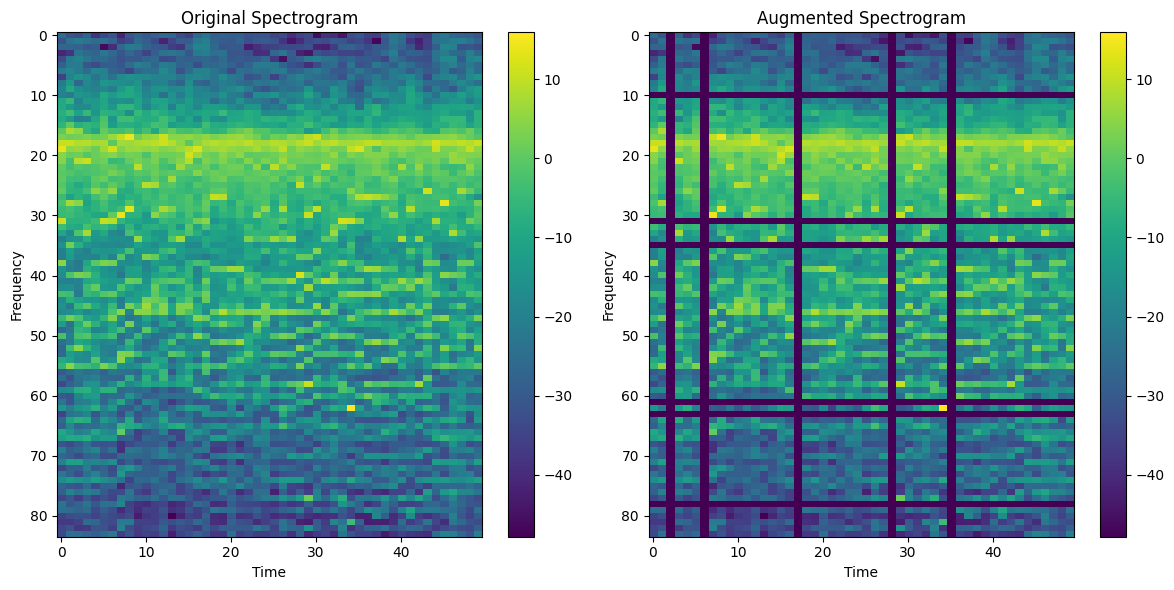

In [17]:
from matplotlib import pyplot as plt

index = 32

# Вычисляем vmin и vmax на основе немаскированной спектрограммы
data.augmentations = False
item = np.array(data[index]['anchor'])
vmin, vmax = item.min(), item.max()

# Включаем аугментацию и получаем маскированную спектрограмму
data.augmentations = True
item_augmented = np.array(data[index]['anchor'])

# Создаем два столбца для отображения
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Отображаем оригинальную спектрограмму
axes[0].imshow(item.T, vmin=vmin, vmax=vmax, aspect='auto')
axes[0].set_title("Original Spectrogram")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Frequency")
axes[0].colorbar = fig.colorbar(axes[0].images[0], ax=axes[0])

# Отображаем спектрограмму с аугментацией
axes[1].imshow(item_augmented.T, vmin=vmin, vmax=vmax, aspect='auto')
axes[1].set_title("Augmented Spectrogram")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Frequency")
axes[1].colorbar = fig.colorbar(axes[1].images[0], ax=axes[1])

# Отображаем графики
plt.tight_layout()
plt.show()


In [17]:
class CoverDataset(Dataset):
    def __init__(
        self,
        data_path: str,
        file_ext: str,
        dataset_path: str,
        data_split: Literal["train", "val", "test"],
        debug: bool,
        max_len: int,
        config: Dict,

    ) -> None:
        super().__init__()
        self.config = config
        self.augmentations = config["augmentations"]
        self.chunk_len = -1

        self.data_path = data_path
        self.file_ext = file_ext
        self.dataset_path = dataset_path
        self.data_split = data_split
        self.debug = debug
        self.max_len = max_len
        self._load_data()

        self.ram_storage = config.get("store_data_in_ram", False)
        if self.ram_storage:
            self.all_cqt_specs = dict()
            self._load_all_cqt()

        self.rnd_indices = np.random.permutation(len(self.track_ids))
        self.current_index = 0
    def set_chunk_len(self, chunk_len):
        self.chunk_len = chunk_len
    def __len__(self) -> int:
        return len(self.track_ids)

    def __getitem__(self, index: int) -> BatchDict:
        track_id = self.track_ids[index]
        anchor_cqt = self._load_cqt(track_id)
        
        if self.data_split == "train":
            clique_id = self.version2clique.loc[track_id, 'clique']
            pos_id, neg_id = self._triplet_sampling(track_id, clique_id)        
            positive_cqt = self._load_cqt(pos_id)
            negative_cqt = self._load_cqt(neg_id)
            neg_clique_id = self.version2clique.loc[neg_id, 'clique']
        else:
            clique_id = -1
            neg_clique_id = -1
            pos_id = torch.empty(0)
            positive_cqt = torch.empty(0)
            neg_id = torch.empty(0)
            negative_cqt = torch.empty(0)
        return dict(
            anchor_id=track_id,
            anchor=anchor_cqt,
            anchor_label=torch.tensor(clique_id, dtype=torch.float),
            positive_id=pos_id,
            positive=positive_cqt,
            negative_id=neg_id,
            negative=negative_cqt,
            negative_label = torch.tensor(neg_clique_id, dtype=torch.float)
        )

    def _make_file_path(self, track_id, file_ext):
        a = track_id % 10
        b = track_id // 10 % 10
        c = track_id // 100 % 10
        return os.path.join(str(c), str(b), str(a), f'{track_id}.{file_ext}')

    def _triplet_sampling(self, track_id: int, clique_id: int) -> Tuple[int, int]:
        versions = self.versions.loc[clique_id, "versions"]
        pos_list = np.setdiff1d(versions, track_id)
        pos_id = np.random.choice(pos_list, 1)[0]
        if self.current_index >= len(self.rnd_indices):
            self.current_index = 0
            self.rnd_indices = np.random.permutation(len(self.track_ids))
        neg_id = self.track_ids[self.rnd_indices[self.current_index]]
        self.current_index += 1
        while neg_id in versions:
            if self.current_index >= len(self.rnd_indices):
                self.current_index = 0
                self.rnd_indices = np.random.permutation(len(self.track_ids))
            neg_id = self.track_ids[self.rnd_indices[self.current_index]]
            self.current_index += 1
        return (pos_id, neg_id)

    def _load_data(self) -> None:
        if self.data_split in ['train', 'val']:
            cliques_subset = np.load(os.path.join(self.data_path, "splits", "{}_cliques.npy".format(self.data_split)))
            self.versions = pd.read_csv(
                os.path.join(self.data_path, "cliques2versions.tsv"), sep='\t', converters={"versions": eval}
            )
            self.versions = self.versions[self.versions["clique"].isin(set(cliques_subset))]
            mapping = {}
            for k, clique in enumerate(sorted(cliques_subset)):
                mapping[clique] = k
            self.versions["clique"] = self.versions["clique"].map(lambda x: mapping[x])
            self.versions.set_index("clique", inplace=True)
            self.version2clique = pd.DataFrame(
                [{'version': version, 'clique': clique} for clique, row in self.versions.iterrows() for version in row['versions']]
            ).set_index('version')
            self.track_ids = self.version2clique.index.to_list()
        else:
            self.track_ids = np.load(os.path.join(self.data_path, "splits", "{}_ids.npy".format(self.data_split)))


    def _load_all_cqt(self):
        for track_id in self.track_ids:
            filename = os.path.join(self.dataset_path, self._make_file_path(track_id, self.file_ext))
            cqt_spectrogram = np.load(filename).transpose(1, 0)
            self.all_cqt_specs[track_id] = cqt_spectrogram
        
    def _load_cqt(self, track_id: str) -> torch.Tensor:
        if self.ram_storage:
            cqt_spectrogram = self.all_cqt_specs[track_id]
        else:
            filename = os.path.join(self.dataset_path, self._make_file_path(track_id, self.file_ext))
            cqt_spectrogram = np.load(filename)
            cqt_spectrogram = cqt_spectrogram.transpose(1, 0)

        if self.augmentations and self.data_split == "train":
            # print("!!!!!!!!!!!!!!USE AUGMENTATIONS!!!!!!!!!!!!!!")
            cqt_spectrogram = self._apply_augmentations(cqt_spectrogram)

        return torch.from_numpy(cqt_spectrogram).float()

SyntaxError: invalid syntax (1679233725.py, line 26)

In [ ]:
from matplotlib import pyplot as plt
data.augmentations=False
data.augmentations=True
item = np.array(data[20]['anchor'])
print(item.shape)
# factor = random.uniform(0.8,1.2)
# factor = 0.8
# new_item = change_tempo_cqt(item.T, 1)
# print(new_item.shape)
plt.imshow(item.T)

In [ ]:
data.augmentations=False


In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline

def apply_smooth_eq(cqt_spectrogram, smoothness=5):
    num_bins = cqt_spectrogram.shape[1]
    x = np.linspace(0, num_bins - 1, num_bins)
    random_points = np.random.uniform(0.5, 1.5, size=(smoothness,))
    print(random_points)
    spline = UnivariateSpline(np.linspace(0, num_bins - 1, smoothness), random_points, s=0)
    eq_curve = spline(x)
    # print(eq_curve)
    plt.plot(eq_curve)
    print(eq_curve.shape)
    print(cqt_spectrogram.shape)
    return cqt_spectrogram * eq_curve

In [ ]:
item.shape

In [ ]:
new_item.shape

In [ ]:
new_item = apply_smooth_eq(item)
new_item /= item
print(new_item, new_item.shape)

In [ ]:
item = np.array(data[15]['anchor'])
# factor = random.uniform(0.8,1.2)
factor = 0.8
new_item = change_tempo_cqt(item.T, 1)
print(new_item.shape)
plt.imshow(new_item)

In [ ]:
plt.imshow(cqt_spectrogram)

In [ ]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(15, 6))

for i, item in enumerate([new_item]):
    cqt_spectrogram = item  # Получаем данные спектрограммы
    
    ax = axs[i // 5, i % 5]
    ax.imshow(cqt_spectrogram, aspect='auto', origin='lower')
    ax.set_title(f"ID: {item['anchor_id']}")
    ax.axis('off')

plt.suptitle(f"CQT-спектрограммы треков из клики {random_clique_id}")
plt.show()


In [ ]:
new_item.shape

In [ ]:
model.eval()
out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

In [ ]:
out